# Density profile of isolated LMC disk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from matplotlib.colors import LogNorm
from scipy.stats import binned_statistic as bs

## Reading the phase space of isolated LMC disk

In [2]:
iso_phase = Table.read('./data/LMC_iso_rotated_phase_space.fits')
iso_pos = iso_phase['u', 'v', 'w']

## Positions of the stellar particles

In [4]:
u, v, w = iso_pos['u'], iso_pos['v'], iso_pos['w']

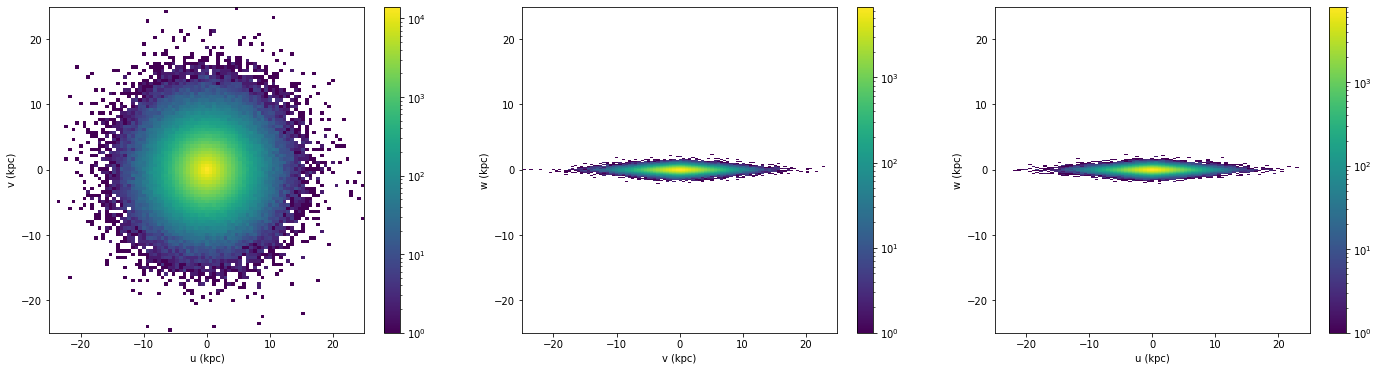

In [5]:
fig = plt.figure(figsize = (24,6))

ax1 = plt.subplot(1,3,1)
h1, xedg1, yedg1, im1 = ax1.hist2d(u, v, bins = 100, norm = LogNorm())
ax1.set_xlabel('u (kpc)')
ax1.set_ylabel('v (kpc)')
ax1.set_xlim(-25, 25)
ax1.set_ylim(-25, 25)
fig.colorbar(mappable = im1, ax = ax1)

ax2 = plt.subplot(1,3,2)
h2, xedg2, yedg2, im2 = ax2.hist2d(v, w, bins = 100, norm = LogNorm())
ax2.set_xlabel('v (kpc)')
ax2.set_ylabel('w (kpc)')
ax2.set_xlim(-25, 25)
ax2.set_ylim(-25, 25)
fig.colorbar(mappable = im2, ax = ax2)

ax3 = plt.subplot(1,3,3)
h3, xedg3, yedg3, im3 = ax3.hist2d(u, w, bins = 100, norm = LogNorm())
ax3.set_xlabel('u (kpc)')
ax3.set_ylabel('w (kpc)')
ax3.set_xlim(-25, 25)
ax3.set_ylim(-25, 25)
fig.colorbar(mappable = im3, ax = ax3)

plt.show()

## Plotting the radial density profile

We extract stars residing in a volume between $u = -10$ kpc and $u = 10$ kpc, $v = -0.5$ kpc and $v = 0.5$ kpc, $w = -0.05$ kpc and $w = 0.05$ kpc 

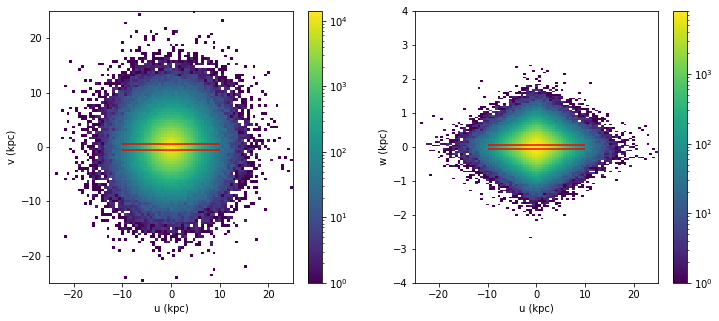

In [6]:
u_low = -10
u_high = 10
v_low = -0.5
v_high = 0.5
w_low = -0.05
w_high = 0.05

fig = plt.figure(figsize = (12,5))

ax1 = plt.subplot(1,2,1)
h1, xedg1, yedg1, im1 = ax1.hist2d(u, v, bins = 100, norm = LogNorm())
ax1.hlines([v_low, v_high], u_low, u_high, color = 'red')
ax1.set_xlabel('u (kpc)')
ax1.set_ylabel('v (kpc)')
ax1.set_xlim(-25, 25)
ax1.set_ylim(-25, 25)
fig.colorbar(mappable = im1, ax = ax1)

ax2 = plt.subplot(1,2,2)
h2, xedg2, yedg2, im2 = ax2.hist2d(u, w, bins = 100, norm = LogNorm())
ax2.hlines([w_low, w_high], u_low, u_high, color = 'red')
ax2.set_xlabel('u (kpc)')
ax2.set_ylabel('w (kpc)')
ax2.set_xlim(-25, 25)
ax2.set_ylim(-4, 4)
fig.colorbar(mappable = im2, ax = ax2)

plt.show()

In [7]:
strip = iso_pos[np.logical_and(np.logical_and(np.logical_and(iso_pos['u'] >= u_low, iso_pos['u'] <= u_high), 
                              np.logical_and(iso_pos['v'] >= v_low, iso_pos['v'] <= v_high))
                               , np.logical_and(iso_pos['w'] >= w_low, iso_pos['w'] <= w_high))]
u1, v1, w1 = strip['u'], strip['v'], strip['w']

len(strip)

25886

For the radial density profile, we choose a binsize of $0.5$ kpc in the $u$ axis. This means we shall be determining the density in a volume $\Delta V = \Delta u \Delta v \Delta w = 0.5 \: \rm{kpc} \times 1 \: \rm{kpc} \times 0.1 \: \rm{kpc} = 0.05$ kpc$^3$. We count the stellar particles in a $\Delta V$ volume as a function of $u$. We denote these by $N(u)$. We average out the counts for negative and positive values of $u$.

In [8]:
u_binsize = 0.5
num_u_bins = int((u_high - u_low)/u_binsize)
u_bins = np.linspace(u_low, u_high, num_u_bins + 1)
cnts, bedges, bnum = bs(u1, u1, statistic = 'count', bins = u_bins)

Averaging for negative and positive values of $u$,

In [9]:
mid_u = int(num_u_bins/2)
N_minus = np.flip(cnts[0:mid_u])
N_plus = cnts[mid_u:num_u_bins]

N = (N_minus + N_plus)/2

The radial density profile is given by:
$$\rho(u) = \frac{<N(u)> M_\ast}{\Delta V},$$
where $M_\ast = 2500 \: M_\odot$ is the mass of a star particle, and $<N(u)>$ is the averaged counts over negative and positive $u$.

In [10]:
Mstar = 2500 # mass of a star particle in M_solar
vol = u_binsize*(v_high - v_low)*(w_high - w_low) # in kpc^3
density = N*Mstar/vol # in M_solar/kpc^3

For computing the error in $N$, we assume the counts follow Poisson statistics. Thus, the error in density will be:
$$\delta \rho(u) = \frac{\sqrt{<N(u)>} M_\ast}{\Delta V} $$

In [11]:
e_density = np.sqrt(N)*Mstar/vol

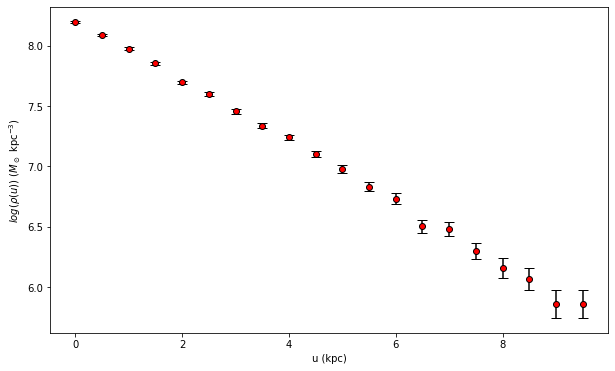

In [12]:
u_bins_left = u_bins[mid_u:-1]

plt.figure(figsize = (10, 6))
plt.errorbar(u_bins_left, np.log10(density), yerr = e_density/(density*np.log(10)), ecolor = 'black', capsize = 5, 
             fmt = 'o', color = 'r', markeredgecolor = 'black')
plt.xlabel('u (kpc)')
plt.ylabel(r'$log(\rho(u))$ ($M_\odot$ kpc$^{-3}$)')
plt.show()

Thus, the radial density profile is well represented by an exponentially decaying function.

In [13]:
#Saving the radial density profile
#np.save('./data/radial_distances', u_bins_left)
#np.save('./data/radial_density', density)
#np.save('./data/radial_density_error', e_density)

## Plotting the vertical density profile

We extract stars residing in a volume between $u = -0.5$ kpc and $u = 0.5$ kpc, $v = -0.5$ kpc and $v = 0.5$ kpc, $w = -1.5$ kpc and $w = 1.5$ kpc 

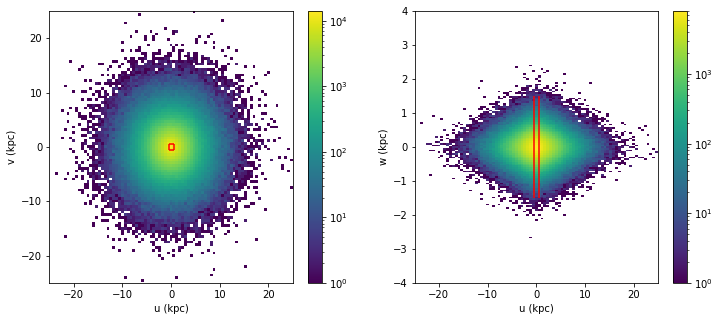

In [14]:
u_low = -0.5
u_high = 0.5
v_low = -0.5
v_high = 0.5
w_low = -1.5
w_high = 1.5

fig = plt.figure(figsize = (12,5))

ax1 = plt.subplot(1,2,1)
h1, xedg1, yedg1, im1 = ax1.hist2d(u, v, bins = 100, norm = LogNorm())
ax1.hlines([v_low, v_high], u_low, u_high, color = 'red')
ax1.vlines([u_low, u_high], v_low, v_high, color = 'red')
ax1.set_xlabel('u (kpc)')
ax1.set_ylabel('v (kpc)')
ax1.set_xlim(-25, 25)
ax1.set_ylim(-25, 25)
fig.colorbar(mappable = im1, ax = ax1)

ax2 = plt.subplot(1,2,2)
h2, xedg2, yedg2, im2 = ax2.hist2d(u, w, bins = 100, norm = LogNorm())
ax2.vlines([u_low, u_high], w_low, w_high, color = 'red')
ax2.set_xlabel('u (kpc)')
ax2.set_ylabel('w (kpc)')
ax2.set_xlim(-25, 25)
ax2.set_ylim(-4, 4)
fig.colorbar(mappable = im2, ax = ax2)

plt.show()

In [15]:
strip = iso_pos[np.logical_and(np.logical_and(np.logical_and(iso_pos['u'] >= u_low, iso_pos['u'] <= u_high), 
                              np.logical_and(iso_pos['v'] >= v_low, iso_pos['v'] <= v_high))
                               , np.logical_and(iso_pos['w'] >= w_low, iso_pos['w'] <= w_high))]
u1, v1, w1 = strip['u'], strip['v'], strip['w']

len(strip)

43455

For the vertical density profile, we choose a binsize of $0.1$ kpc in the $w$ axis. This means we shall be determining the density in a volume $\Delta V = \Delta u \Delta v \Delta w = 1 \: \rm{kpc} \times 1 \: \rm{kpc} \times 0.1 \: \rm{kpc} = 0.1$ kpc$^3$. We count the stellar particles in a $\Delta V$ volume as a function of $u$. We denote these by $N(w)$. We average out the counts for negative and positive values of $w$.

In [16]:
w_binsize = 0.1
num_w_bins = int((w_high - w_low)/w_binsize)
w_bins = np.linspace(w_low, w_high, num_w_bins + 1)
cnts, bedges, bnum = bs(w1, w1, statistic = 'count', bins = w_bins)

Averaging for negative and positive values of $w$,

In [17]:
mid_w = int(num_w_bins/2)
N_minus = np.flip(cnts[0:mid_w])
N_plus = cnts[mid_w:num_w_bins]

N = (N_minus + N_plus)/2

The vertical density profile is given by:
$$\rho(w) = \frac{<N(w)> M_\ast}{\Delta V},$$
where $M_\ast = 2500 \: M_\odot$ is the mass of a star particle, and $<N(w)>$ is the averaged counts over negative and positive $w$.

In [18]:
Mstar = 2500 # mass of a star particle in M_solar
vol = (u_high - u_low)*(v_high - v_low)*w_binsize # in kpc^3
density = N*Mstar/vol # in M_solar/kpc^3

For computing the error in $N$, we assume the counts follow Poisson statistics. Thus, the error in density will be:
$$\delta \rho(w) = \frac{\sqrt{<N(w)>} M_\ast}{\Delta V} $$

In [19]:
e_density = np.sqrt(N)*Mstar/vol

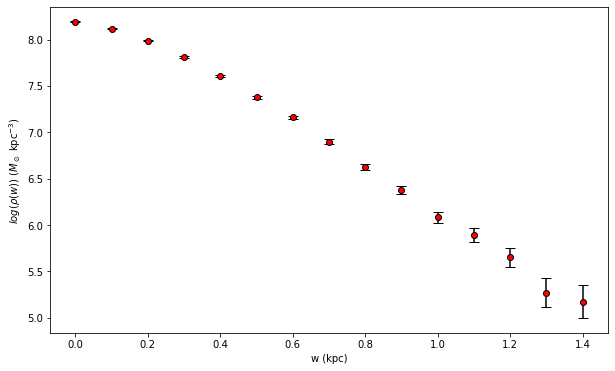

In [20]:
w_bins_left = w_bins[mid_w:-1]

plt.figure(figsize = (10, 6))
plt.errorbar(w_bins_left, np.log10(density), yerr = e_density/(density*np.log(10)), ecolor = 'black', capsize = 5, 
             fmt = 'o', color = 'r', markeredgecolor = 'black')
plt.xlabel('w (kpc)')
plt.ylabel(r'$log(\rho(w))$ ($M_\odot$ kpc$^{-3}$)')
plt.show()

In the above the tapering for low values of $w$ is because the the vertical distribution is not exactly an exponential profile, rather it is a $sech^2$ profile.

In [21]:
#Saving the vertical density profile
#np.save('./data/vertical_distances', w_bins_left)
#np.save('./data/vertical_density', density)
#np.save('./data/vertical_density_error', e_density)